In [ ]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28*28))


def pca(data):
    cova = cov(data.T)
    values, vectors = eig(cova)
    idx = (np.argsort(np.abs(values))[::-1])
    values = values[idx]
    vectors = vectors[idx]
    return values, vectors

values, vectors = pca(X_train)
P = vectors.T[:2].dot(X_train.T)
plt.scatter(P.T[:, 0], P.T[:, 1],c=y_train)
print(P.T.shape)
show()

(60000, 2)


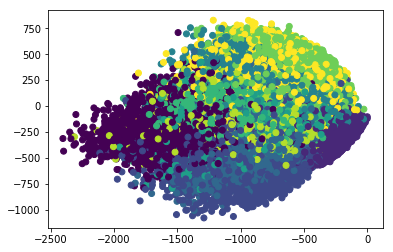